In [13]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START,END
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from typing import TypedDict,Literal
from dotenv import load_dotenv

In [ ]:
load_dotenv()

model=ChatOpenAI()

In [3]:
class QuadState(TypedDict):

    a : int
    b : int
    c : int

    equation : str
    determinant : float
    result : str

In [14]:
def show_equation(state:QuadState)->dict:

    a = state['a']
    b = state['b']
    c = state['c']

    equation = f'({a})x2 + ({b})x + ({c})'

    return {'equation':equation}

def calculate_determinant(state:QuadState)->dict:

    a = state['a']
    b = state['b']
    c = state['c']

    determinant = ((b**2) - (4*a*c))

    return {'determinant':determinant}

def no_real_roots(state:QuadState)->dict:

    determinant = state['determinant']

    result = f'No real roots exists'

    return {'result':result}

def equal_roots(state:QuadState)->dict:

    determinant = state['determinant']
    b = state['b']
    a = state['a']

    roots = (-b)/(2*a)

    results = f'Equation has 2 equal roots : {roots}'

    return {'result':results}

def real_roots(state:QuadState)->dict:

    a = state['a']
    b = state['b']
    c = state['c']
    determinant = state['determinant']

    root1 = ((-b) + determinant)/(2*a)
    root2 = ((-b) - determinant)/(2*a)

    result = f'The two roots are {root1} and {root2}'

    return {'result':result}

def condition_logic(state:QuadState)->Literal["real_roots", "equal_roots", "no_real_roots"]:

    determinant = state['determinant']

    if determinant > 0:
        return 'real_roots'
    elif determinant ==0:
        return 'equal_roots'
    else:
        return 'no_real_roots'

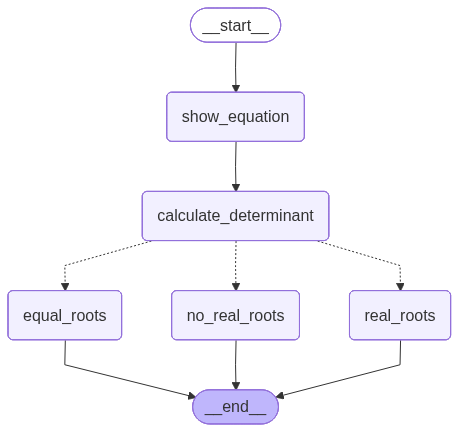

In [19]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_determinant',calculate_determinant)
graph.add_node('no_real_roots',no_real_roots)
graph.add_node('equal_roots',equal_roots)
graph.add_node('real_roots',real_roots)

# graph.add_node('condition_logic',condition_logic)  -----> Not Required

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_determinant')
graph.add_conditional_edges('calculate_determinant',condition_logic)
graph.add_edge('equal_roots',END)
graph.add_edge('real_roots',END)
graph.add_edge('no_real_roots',END)

workflow = graph.compile()

workflow

In [23]:
initial_state = {
    'a' : -3,
    'b' : 6,
    'c' : -3
    }

final_state = workflow.invoke(initial_state)

final_state

{'a': -3,
 'b': 6,
 'c': -3,
 'equation': '(-3)x2 + (6)x + (-3)',
 'determinant': 0,
 'result': 'Equation has 2 equal roots : 1.0'}